# Trabalho 02 Unidade 03
### Discente: Ailson Forte dos Santos

## Descrição:
Realizar um estudo com diferentes configurações de redundância (TMR, 5MR, paralela com 2,3,4 dispositivos), valores de lambda. Identificar no estudo os valores temporais que a partir deles não se justifica o uso de redundância. Para cada cenário traçar linhas verticais indicando o MTTF de cada modelo de redundância. 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def relaibility_prob(l1, l2, t):
    return ((l2/(l2-l1))*(math.e**(-(l1*t)))) - ((l1/(l2-l1))*(math.e**(-(l2*t))))

In [3]:
def combination(n, p):
    return math.factorial(n)/(math.factorial(n-p)*math.factorial(p))

In [4]:
def TMR(R, n):
    tmr = [ combination(n,i)*(R**i)*((1-R)**(n-i)) for i in range(2,n+1)]
    return np.sum(tmr)

In [5]:
def plot_relaiabilities(ax,l):
    T = [t/100.0 for t in range(151)]
    R = [relaibility_prob(3*l, 2*l, t) for t in T]
    R_TMR = [TMR(r,3) for r in R]
    R_5MR = [TMR(r,5) for r in R]
    R_2_disps = [1 - ((1-r)**2) for r in R]
    R_3_disps = [1 - ((1-r)**3) for r in R]
    R_4_disps = [1 - ((1-r)**4) for r in R]

    sns.set()

    ax.plot(T,R)
    ax.plot(T,R_TMR,label='R_TMR')
    ax.plot(T,R_5MR,label='5MR')
    ax.plot(T,R_2_disps,label='Parallel 2 disps.')
    ax.plot(T,R_3_disps,label='Parallel 3 disps.')
    ax.plot(T,R_4_disps,label='Parallel 4 disps.')

    ax.set_xlabel('Tempo')
    ax.set_ylabel('Confiabilidade do sistema')
    ax.set_title('lambda = ' + str(l))
    ax.legend(loc=0)
    return ax

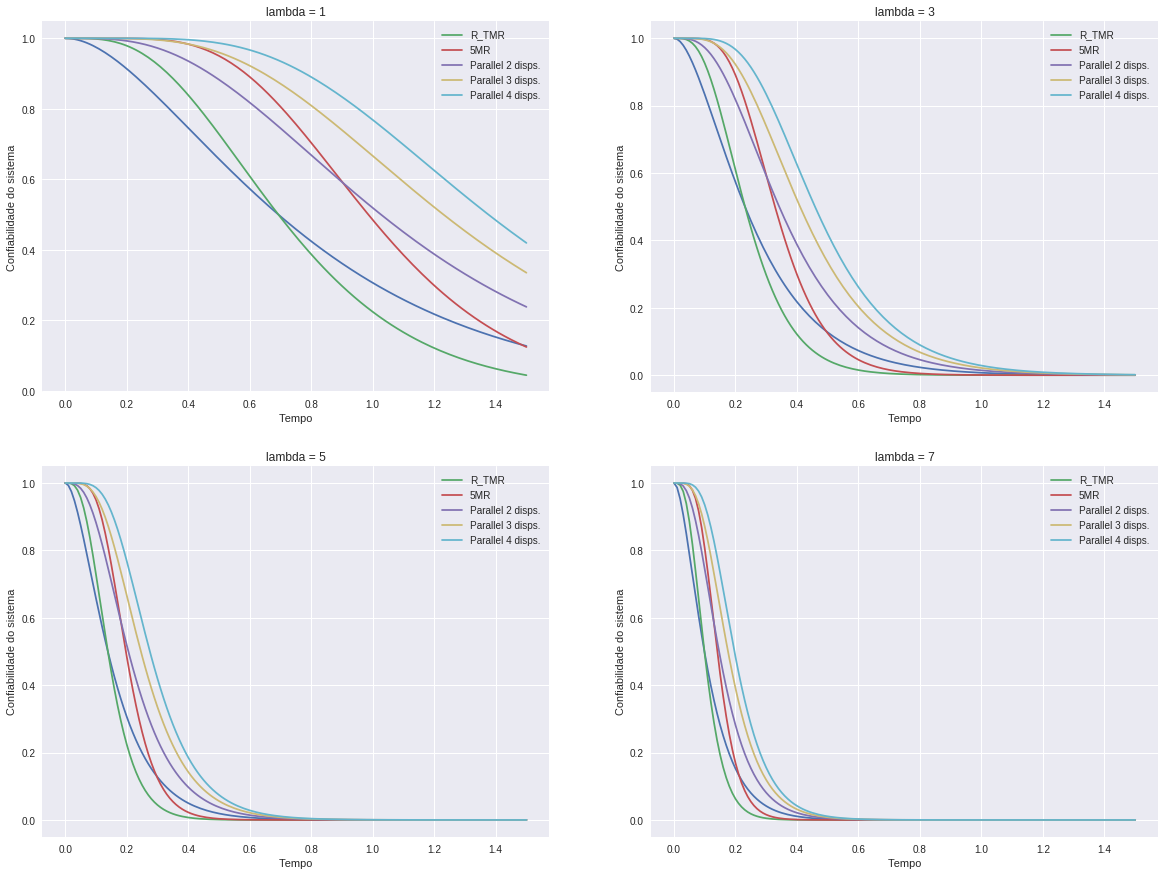

In [6]:
fig = plt.figure(figsize=(20,15))
ax_lambda_1 = fig.add_subplot(2,2,1)
ax_lambda_3 = fig.add_subplot(2,2,2)
ax_lambda_5 = fig.add_subplot(2,2,3)
ax_lambda_7 = fig.add_subplot(2,2,4)
ax_lambda_1 = plot_relaiabilities(ax_lambda_1, 1)
ax_lambda_3 = plot_relaiabilities(ax_lambda_3, 3)
ax_lambda_5 = plot_relaiabilities(ax_lambda_5, 5)
ax_lambda_7 = plot_relaiabilities(ax_lambda_7, 7)

plt.show()